The Problem: Cats vs. Dogs
We need a concrete problem to solve. We want to build an AI that distinguishes between Cats and Dogs based on data.
1. The Features (Inputs) We cannot just feed "cuteness" into a computer. We need numbers. We measure two specific features for every animal:
• X 
1
​
 : Whisker Length. (Cats typically have longer whiskers).
• X 
2
​
 : Ear Flappiness Index. (Dogs typically have flappier ears).
2. The Labels (Outputs) This is a binary classification problem. We convert the names into numbers:
• Dog: +1
• Cat: −1

--------------------------------------------------------------------------------
Step 1: Gather the Data
Imagine we went to a park and measured 7 animals.
• Dogs (Positive Class +1): Generally have high Ear Flappiness (X 
2
​
 ) and low Whisker Length (X 
1
​
 ).
• Cats (Negative Class -1): Generally have low Ear Flappiness (X 
2
​
 ) and high Whisker Length (X 
1
​
 ).
Visual Exercise: Draw a graph in your notebook.
• X-axis: Whisker Length.
• Y-axis: Ear Flappiness.
• Plot a cluster of "Plus Signs" (+) in the top left (Dogs).
• Plot a cluster of "Minus Signs" (-) in the bottom right (Cats).

--------------------------------------------------------------------------------
Step 2: Generate the Hypothesis Class
Now, how do we separate these two groups?
1. The Intuition We want to draw a straight line through the graph so that all the Dogs are on one side and all the Cats are on the other. This straight line is our Linear Classifier.
2. The Mathematics (The Equation) A straight line in 2D is represented by the equation: 
θ 
1
​
 X 
1
​
 +θ 
2
​
 X 
2
​
 +θ 
0
​
 =0
• θ 
1
​
 ,θ 
2
​
 : These determine the angle/slope of the line.
• θ 
0
​
 : This is the offset (bias), determining where the line sits relative to the origin.
3. The Classifier Function (The Sign Function) The line is just a boundary. To make a prediction (+1 or −1), we check which side of the line a point falls on. We use the Sign Function (S):
h(x)=sign(θ 
1
​
 X 
1
​
 +θ 
2
​
 X 
2
​
 +θ 
0
​
 )
• Rule:
    ◦ If the result inside the parenthesis is positive (> 0), we predict Dog (+1).
    ◦ If the result inside the parenthesis is negative (< 0), we predict Cat (-1).
    ◦ If it is 0, the point is exactly on the line.

--------------------------------------------------------------------------------
Step 3: Define the Loss Function (The Scorecard)
How do we know if a specific line (Hypothesis) is good or bad? We count the mistakes.
• The Definition: The Loss Function is simply the Number of Errors.
• The Goal: Find the line that results in Zero Loss.

--------------------------------------------------------------------------------
Coach's "Code-on-Paper" Exercise
We are not using Python yet. We are going to "run" the algorithm manually to prove we understand the math.
The Dataset (Training Data): Let's define 4 specific points (Animals).
1. Animal A (Dog): X=. True Label = +1.
2. Animal B (Dog): X=. True Label = +1.
3. Animal C (Cat): X=. True Label = −1.
4. Animal D (Cat): X=. True Label = −1.
The Candidates (Hypothesis): We have two proposed lines. Which one is better?
Candidate 1 (H 
1
​
 ): Equation is y−x+1=0.
(In Theta form: −1⋅X 
1
​
 +1⋅X 
2
​
 +1=0)
Let's test Animal A (Dog):
• Math: −1(1)+1(1)+1=1.
• Result: 1 is positive.
• Prediction: Dog (+1).
• Actual: Dog (+1).
• Mistake? No.
Let's test Animal C (Cat):
• Math: −1(5)+1(1)+1=−3.
• Result: −3 is negative.
• Prediction: Cat (-1).
• Actual: Cat (-1).
• Mistake? No.
Result for H 
1
​
 : If you check all points, H 
1
​
  makes 0 mistakes. The Loss is 0.
Candidate 2 (H 
2
​
 ): Equation is y−1.5=0.
(In Theta form: 0⋅X 
1
​
 +1⋅X 
2
​
 −1.5=0)
Let's test Animal A (Dog):
• Math: 0(1)+1(1)−1.5=−0.5.
• Result: Negative.
• Prediction: Cat (-1).
• Actual: Dog (+1).
• Mistake? YES.
Result for H 
2
​
 : This line classifies a Dog as a Cat. It has a High Loss.

--------------------------------------------------------------------------------
Coach's Summary for Lecture 6
You have just performed a manual validation of a machine learning model.
1. We Gathered Data: Whisker length vs. Ear flappiness.
2. We Defined a Hypothesis: The straight line (θ 
T
 x+θ 
0
​
 ).
3. We Defined Loss: Counting the number of misclassified animals.
4. We Compared Models: We mathematically proved that Line H 
1
​
  is better than Line H 
2
​
 .
What's Next? We know how to check if a line is good. But we cannot manually check infinite lines to find the best one. We need an Algorithm to find the best line for us automatically.

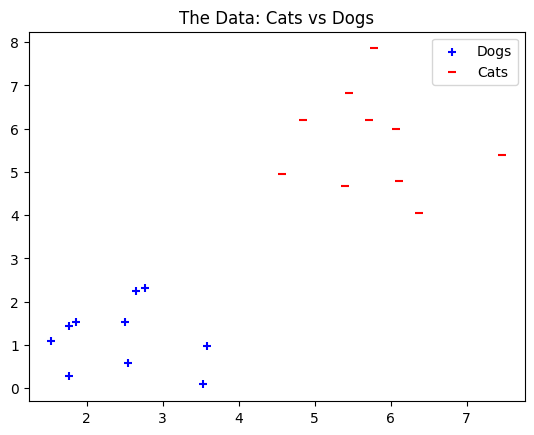

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Data
# We use a "seed" so we get the same random numbers every time
np.random.seed(42)

# Generate 10 Dogs (Positive Class +1) centered at (2, 2)
dogs_x = np.random.normal(2, 1, 10)
dogs_y = np.random.normal(2, 1, 10)
dogs_labels = np.ones(10) # Label = +1

# Generate 10 Cats (Negative Class -1) centered at (6, 6)
cats_x = np.random.normal(6, 1, 10)
cats_y = np.random.normal(6, 1, 10)
cats_labels = np.full(10, -1) # Label = -1

# Combine them into one dataset
# X is our features (Whisker, Ears)
X = np.vstack((np.column_stack((dogs_x, dogs_y)), 
               np.column_stack((cats_x, cats_y))))
# Y is our labels (+1 or -1)
Y = np.concatenate((dogs_labels, cats_labels))

# Plot to see the data
plt.scatter(dogs_x, dogs_y, c='blue', marker='+', label='Dogs')
plt.scatter(cats_x, cats_y, c='red', marker='_', label='Cats')
plt.legend()
plt.title("The Data: Cats vs Dogs")
plt.show()

In [3]:
def random_linear_classifier(X, Y, k):
    """
    X: Features
    Y: Labels
    k: Number of random guesses (Hyperparameter)
    """
    best_error = float('inf') # Start with infinite error
    best_theta = np.zeros(2)  # Theta1, Theta2
    best_theta0 = 0           # Bias

    # STEP 1: Loop k times
    for i in range(k):
        
        # STEP 2: Random Guess
        # Random vector for the angle (theta) and offset (theta0)
        current_theta = np.random.normal(0, 1, 2) 
        current_theta0 = np.random.normal(0, 1)
        
        current_error = 0
        
        # STEP 3: Compute Error (Check every point)
        for j in range(len(X)):
            features = X[j]
            true_label = Y[j]
            
            # The Decision Boundary Math: theta . x + theta0
            prediction_value = np.dot(current_theta, features) + current_theta0
            
            # The Sign Function Logic
            # If value > 0, prediction is +1. If value < 0, prediction is -1.
            if prediction_value > 0:
                prediction = 1
            else:
                prediction = -1
            
            # Did we make a mistake?
            if prediction != true_label:
                current_error += 1
        
        # STEP 4: Keep the Best
        if current_error < best_error:
            best_error = current_error
            best_theta = current_theta
            best_theta0 = current_theta0
            
    return best_theta, best_theta0, best_error

Lowest Error Found: 0


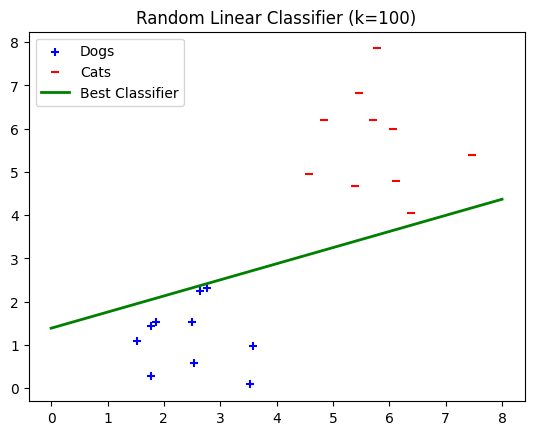

In [5]:
theta_opt, theta0_opt, min_err = random_linear_classifier(X, Y, k=100)

print(f"Lowest Error Found: {min_err}")

# --- Visualization Code (To see the line) ---
# To plot a line in 2D we need y = mx + c format.
# From theta1*x + theta2*y + theta0 = 0 -> y = -(theta1*x + theta0)/theta2

# Generate x-values for the line
x_vals = np.linspace(0, 8, 100)
# Calculate y-values using the decision boundary formula
y_vals = -(theta_opt[0] * x_vals + theta0_opt) / theta_opt[1]

# Plot Data
plt.scatter(dogs_x, dogs_y, c='blue', marker='+', label='Dogs')
plt.scatter(cats_x, cats_y, c='red', marker='_', label='Cats')

# Plot the Winner Line
plt.plot(x_vals, y_vals, c='green', linewidth=2, label='Best Classifier')
plt.legend()
plt.title(f"Random Linear Classifier (k=100)")
plt.show()